### Epsilon greedy algorithm

In [86]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [76]:
class Bandit:
    def __init__(self, success_chance):
        self.success_chance = success_chance
    
    def roll(self):
        if random.random() < self.success_chance:
            return 1
        else:
            return 0
            

In [190]:
class EpsilonGreedyOptymalizer:
    def __init__(self, bandits, epsilon, opt_init=None):
        self.bandits = bandits
        self.epsilon = epsilon
        self.X = [0 if opt_init==None else opt_init] * len(bandits) # List for mean value for each bandit
        self.N = [0 if opt_init==None else 1] * len(bandits) # List for number of rolls for each bandit
        
    def step(self):
        i = None
        # Choose bandit for roll
        if random.random() < self.epsilon:
           i = random.randint(0, len(self.X) - 1)
        else:
            i = self.X.index(max(self.X))
        
        # Roll
        bandit_result = self.bandits[i].roll()
        # Update weights
        self.N[i] += 1
        self.X[i] = (1 / self.N[i]) * ((self.N[i] - 1) * self.X[i] + bandit_result)
        
        
        return bandit_result
    
    def train(self, epochs=100_000):
        history = []
        for i in range(epochs):
            result = self.step()
            history.append(result)
        hist_np = np.array(history)
        return np.cumsum(hist_np) / (np.arange(epochs) + 1)

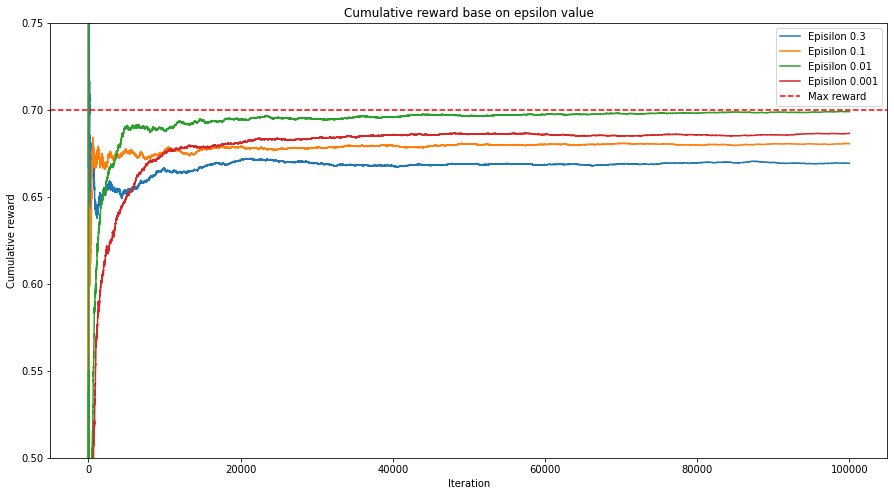

In [191]:
bandits = [Bandit(0.4), Bandit(0.5), Bandit(0.6), Bandit(0.65), Bandit(0.675), Bandit(0.69), Bandit(0.7)]

optymizer_eps_highest = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.3)
optymizer_eps_high = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.1)
optymizer_eps_medium = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.01)
optymizer_eps_lowest = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.001)


plt.figure(figsize=(15, 8))

plt.plot(optymizer_eps_highest.train(), label='Episilon 0.3')
plt.plot(optymizer_eps_high.train(), label='Episilon 0.1')
plt.plot(optymizer_eps_medium.train(), label='Episilon 0.01')
plt.plot(optymizer_eps_lowest.train(), label='Episilon 0.001')

plt.axhline(y=0.70, color='r', linestyle='--', label='Max reward')
plt.ylim(0.5, 0.75)

plt.title('Cumulative reward base on epsilon value')
plt.xlabel('Iteration')
plt.ylabel('Cumulative reward')

plt.legend()

plt.show()


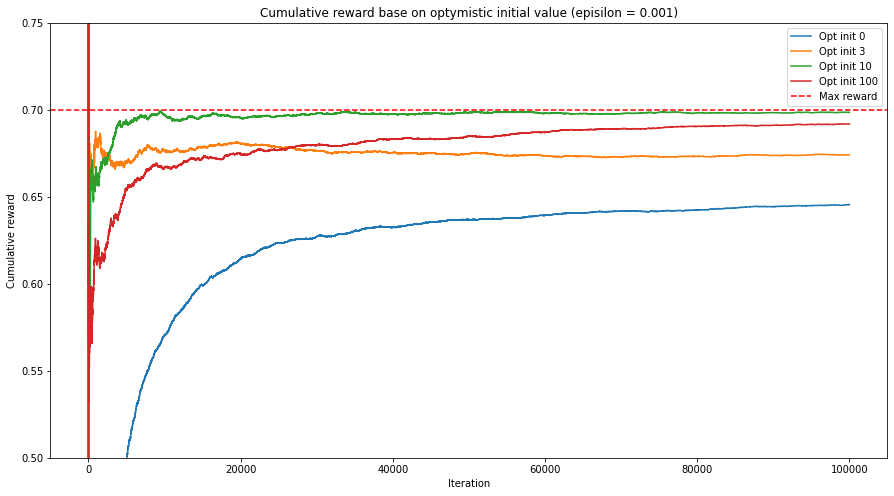

In [206]:
bandits = [Bandit(0.4), Bandit(0.5), Bandit(0.6), Bandit(0.65), Bandit(0.675), Bandit(0.69), Bandit(0.7)]

optymizer_init_null = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.001)
optymizer_init_low = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.001, opt_init=3)
optymizer_init_medium = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.001, opt_init=10)
optymizer_init_high = EpsilonGreedyOptymalizer(bandits=bandits, epsilon=0.001, opt_init=100)



plt.figure(figsize=(15, 8))

plt.plot(optymizer_init_null.train(), label='Opt init 0')
plt.plot(optymizer_init_low.train(), label='Opt init 3')
plt.plot(optymizer_init_medium.train(), label='Opt init 10')
plt.plot(optymizer_init_high.train(), label='Opt init 100')

plt.axhline(y=0.70, color='r', linestyle='--', label='Max reward')
plt.ylim(0.5, 0.75)

plt.title('Cumulative reward base on optymistic initial value (episilon = 0.001)')
plt.xlabel('Iteration')
plt.ylabel('Cumulative reward')

plt.legend()

plt.show()